In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Introduction

Let's first understand what kind of data we have and what we can do with it.

In [6]:
df = pd.read_csv("data_flywheel.csv")
df.head()

,keyword_id,keyword_rank,date,searches,search_engine
0,338145,25218,2022-07-08,53000,0
1,366846,906743,2022-07-08,0,0
2,8590017696,136761,2022-07-08,7000,0
3,8590268435,60380,2022-07-08,20033,0
4,17179954797,239930,2022-07-08,2000,0


Here is what we can understand from the Dataset :

*   **keyword_id**: A unique identifier for each keyword.
*   **keyword_rank**: The rank of the keyword in search results.
*   **date**: The date on which the data was recorded.
*   **searches**: The number of searches for that keyword.
*   **search_engine**: An identifier for the search engine (presumably each number represents a specific search engine).

### Descriptive Statistics

Let's analyze the raw statistics

In [7]:
desc_stats = df.describe()
desc_stats

,keyword_id,keyword_rank,searches,search_engine
count,4.693080e+05,4.693080e+05,4.693080e+05,469308.000000
mean,1.955014e+12,7.439009e+05,8.550373e+03,6.818188
std,1.290018e+12,1.388063e+06,8.279563e+04,5.185202
min,5.850000e+03,3.000000e+00,0.000000e+00,0.000000
25%,7.988642e+11,7.421850e+04,0.000000e+00,3.000000
50%,1.838246e+12,2.360955e+05,0.000000e+00,5.000000
75%,3.049427e+12,7.821010e+05,3.000000e+03,10.000000
max,4.389457e+12,1.391182e+07,1.863716e+07,25.000000



*   The Dataset contains 469 308 entries
*   We have a total of 25 search_engine

*   Keyword IDs range widely, indicating a diverse set of keywords.
*   Keyword ranks vary greatly, with some keywords ranking as high as 13,911,820.
*   The number of searches per keyword also shows a wide range, with a maximum of 18,637,160 searches.





### Missing Values

Let's check if there are any missing values in our dataset.

In [8]:
missing_values = df.isnull().sum()
missing_values

keyword_id       0
keyword_rank     0
date             0
searches         0
search_engine    0
dtype: int64

There are no missing values in our dataset : the dataset is complete.

### Duplicates

Let's check if there are any duplicates in the dataset.

In [9]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

No duplicates were found in the dataset.

### Unique Keywords

In [10]:
unique_keywords = df['keyword_id'].nunique()
unique_keywords

109143

There are 109 143 unique keywords in the dataset.

### Date range

In [11]:
df_range = df['date'].min(), df['date'].max()
df_range

('2022-07-08', '2022-07-14')

The data starts from july 8th 2022 to july 14th 2022

### Search Distribution

In [12]:
searches_distribution = df['searches'].describe()
searches_distribution

count    4.693080e+05
mean     8.550373e+03
std      8.279563e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+03
max      1.863716e+07
Name: searches, dtype: float64



*   The average number of searches per keyword is approximately 8,550.
*   However, there's a significant standard deviation, suggesting that the number of searches per keyword varies greatly.
*   50% of keywords have zero searches, indicating that many keywords did not attract any searches during the observed period.




### Search Engine

In [13]:
unique_search_engines = df['search_engine'].nunique()
unique_search_engines

26

The dataset contains data from 26 unique search engines.

### Conclusion

What we can understand about the data is that it captures a **wide range of keywords** with varying popularity and search engine rankings. The large standard deviation in searches and keyword ranks suggests a **highly variable landscape** in terms of **keyword performance**. The absence of missing values and the presence of multiple search engines in the data provides a comprehensive view of keyword trends over **a week in July 2022**.

## Analysis of the problematic

To have more comprehensive understanding of the assignement, I like to imagine where the dataset could come from.

I can suppose the data comes from a **digital marketing agency** and the client is interested in understanding **the performance of their keywords on different search engines**.

This is the reason why they are asking for a **keyword performance analysis**.

Our objective is the following : determine how well specific keywords are performing, particularly those that **rank first**.

This way, we can identify **which search engines are most effective** in displaying the client's website as **the top result for relevant keywords**.

If i were a digital marketing agency, what I would also be interested in **seasonal keyword trends**. Indeed, given the dataset, it could also be interresting to understand how the **number of searches for specific keywords varies over time**.

Another idea would be to analyze the **search engine market share**. We could get the overall market share of different search engines for the client's keywords. This way we could determine which **search engines dominate the market** for the client's keyword.

Now that we have an overview of both the data and the problematic let's analyze the data !

## Visualizations of the data

### Top ranked keyword_id for each search engine

We want to know what are the most important keywords for each search engine.As there are no rank 1 we will look for the lowest rank for each search engine.

In [14]:

# Grouping by search engine and finding the keyword with the highest rank (lowest rank number)
lowest_ranked_keywords = df.groupby('search_engine').apply(lambda x: x[x['keyword_rank'] == x['keyword_rank'].min()])

# Extracting the number of searches for these lowest ranked keywords by search engine
searches_for_lowest_ranked_keywords = lowest_ranked_keywords[['search_engine', 'searches','keyword_id','keyword_rank']].set_index('search_engine')

searches_for_lowest_ranked_keywords

,searches,keyword_id,keyword_rank
search_engine,,,
0,1252793,107796,131
1,7419497,704374905883,57
2,13000,3650722206274,10990
3,547986,4148938482137,40
4,488266,309238066050,16
5,932521,446676669250,53
6,2210918,1073742334476,24
7,5210783,369367302479,43
8,1334983,1606317975332,3


Let's check if one top ranked keyword is similar to different search engine.

In [16]:
duplicates = searches_for_lowest_ranked_keywords[searches_for_lowest_ranked_keywords['keyword_id'].duplicated(keep=False)]
duplicates_sorted = duplicates.sort_values(by='keyword_id')
print(duplicates_sorted)

               searches     keyword_id  keyword_rank
search_engine                                       
13              2320465  1554778255514             3
13              8312244  1554778255514             3
13             10424650  1554778255514             3
13              2172276  1554778255514             3
13              1965862  1554778255514             3
13              2020650  1554778255514             3
8               1334983  1606317975332             3
8               1213935  1606317975332             3


There are no top ranked keywords that are similar to different search engine. However, there are two keywords that appeared on the same top rank on search engine number 13 and 8.

### Further Analysis on keywords and search engines

Let's take a deeper look at each search engine and their distribution to get some insight about the keywords and their tendency on different search engine.

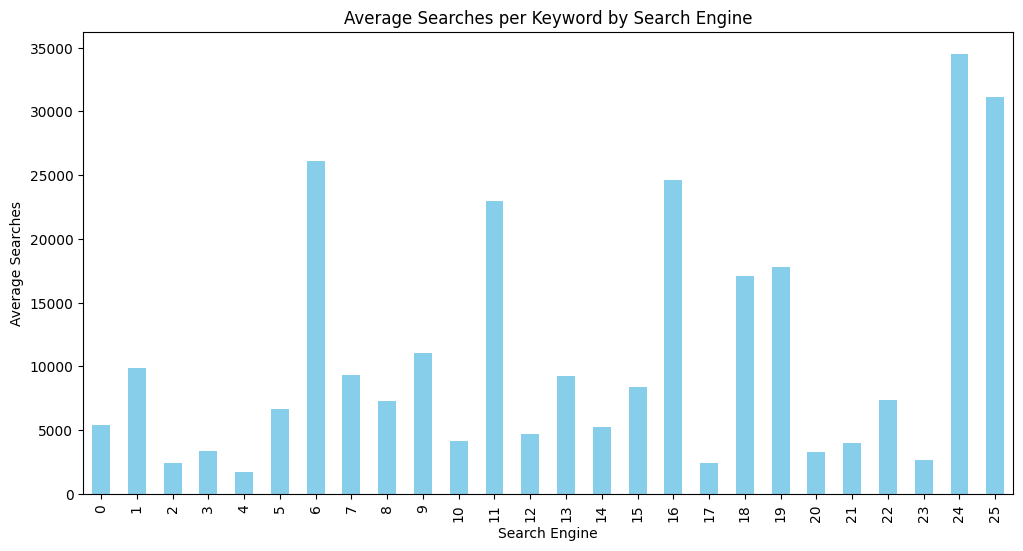

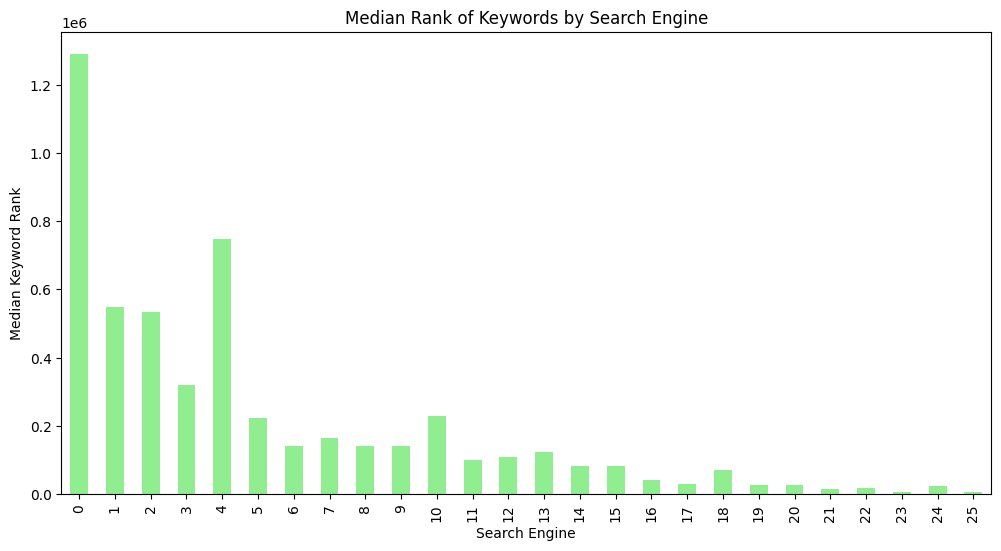

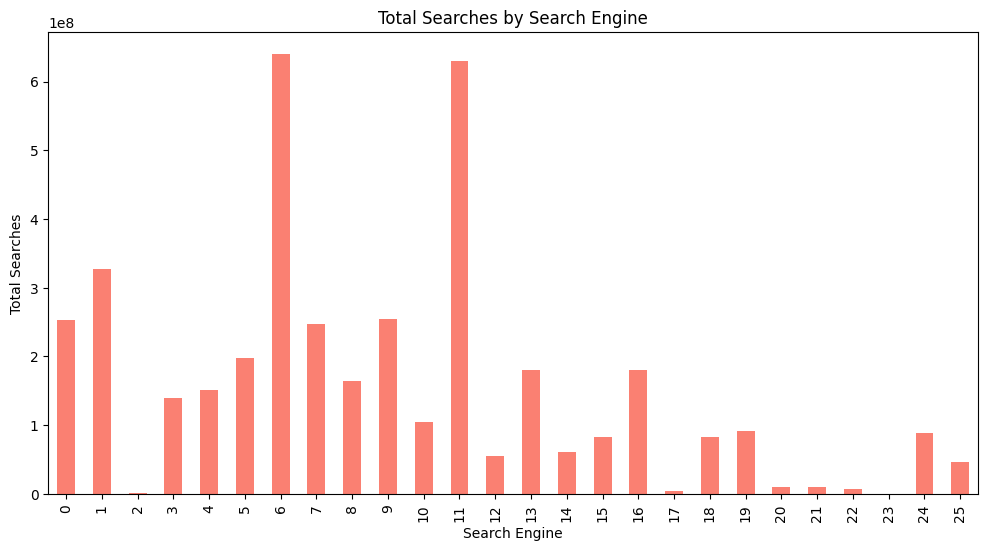

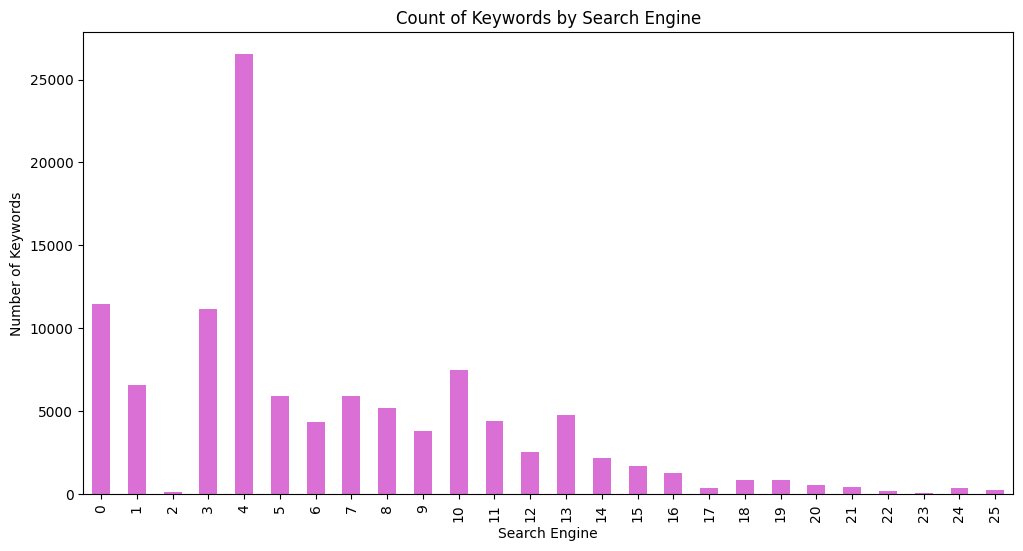

In [20]:
import matplotlib.pyplot as plt

# Re-creating the visualizations for the four analyses

# Plot 1: Average Searches per Keyword by Search Engine
plt.figure(figsize=(12, 6))
avg_searches_per_engine = df.groupby('search_engine')['searches'].mean()
avg_searches_per_engine.plot(kind='bar', color='skyblue')
plt.title('Average Searches per Keyword by Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Average Searches')
plt.show()

# Plot 2: Median Rank of Keywords by Search Engine
plt.figure(figsize=(12, 6))
median_rank_per_engine = df.groupby('search_engine')['keyword_rank'].median()
median_rank_per_engine.plot(kind='bar', color='lightgreen')
plt.title('Median Rank of Keywords by Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Median Keyword Rank')
plt.show()

# Plot 3: Total Searches by Search Engine
plt.figure(figsize=(12, 6))
total_searches_per_engine = df.groupby('search_engine')['searches'].sum()
total_searches_per_engine.plot(kind='bar', color='salmon')
plt.title('Total Searches by Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Total Searches')
plt.show()

# Plot 4: Count of Keywords by Search Engine
plt.figure(figsize=(12, 6))
keyword_count_per_engine = df.groupby('search_engine')['keyword_id'].nunique()
keyword_count_per_engine.plot(kind='bar', color='orchid')
plt.title('Count of Keywords by Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Number of Keywords')
plt.show()




**Average Searches per Keyword by Search Engine:**

This bar chart shows the average number of searches for each search engine. Some engines, like 6, 24, and 25, show notably higher averages, suggesting more active search behavior.

**Median Rank of Keywords by Search Engine:**

This visualization illustrates the median keyword rank for each search engine. Lower median ranks in engines like 23, 25, and 21 indicate that keywords tend to rank higher on these platforms.

**Total Searches by Search Engine:**

The total number of searches per search engine is displayed here. Search engines like 6, 11, and 1 exhibit significantly higher total search counts, indicating their prominence in terms of search volume.

**Count of Keywords by Search Engine:**

This chart shows the number of unique keywords tracked for each search engine. Search engines like 4, 0, and 3 have a larger variety of keywords being monitored.




**Analysis** :

There are two types of search engine that could be interresting for the clients : one that is **overall popular** but also one that is **popular on specific items**.

**Let's first take a look at number 24 and 25 :**

From graph 1 we can understand that serach engine number 24 and 25 have high average search per keyword.
In graph 2, we can see that those two search engines have a low Median Rank which means the keywords tend to be searched and at least half of them are well ranked.
From graph 3, with the total searches, we can see that number 24 and 25 aren't making many research on total. So this could mean that those two engines are well known for specific keywords.  For example, if these search engines are frequently used for specific queries that are highly relevant but infrequent, those queries might get a lot of searches individually, which is confirmed with graph 4.


**Now let's take a look at number 6 and 11 which are the search engine with the most total search**.

Let's first note that both search engine are far ahead others in terms of total search. Which means that these are potentially the most interresting one to the client.
From Graph 1, the average search per keyword are both in the highest among the others search engine.
From Graph 2, we can tell they rank well eventhough they have a high number of search.
From graph 4, we can see that they have a low count of keywords.

Search engines 6 and 11 might have a broad user base, making them popular choices for a wide range of searches. This widespread use could contribute to their high total search volumes despite having a lower number of distinct keywords.
They could be general-purpose search engines, as opposed to niche or specialized ones. General-purpose search engines are likely to accumulate a vast number of searches across a wide range of topics, even if they don't rank high for specific niche keywords.
These search engines might be particularly efficient or preferred for common queries, which constitute a large volume of searches. Users often go for the most efficient option for everyday searches, which might not necessarily be the top-ranked keywords.

### Time series analysis

Finally, a feature that have been set aside is the Datetime. Indeed, we only have data over a week. I plotted the performance of keywords on different search engines over time.

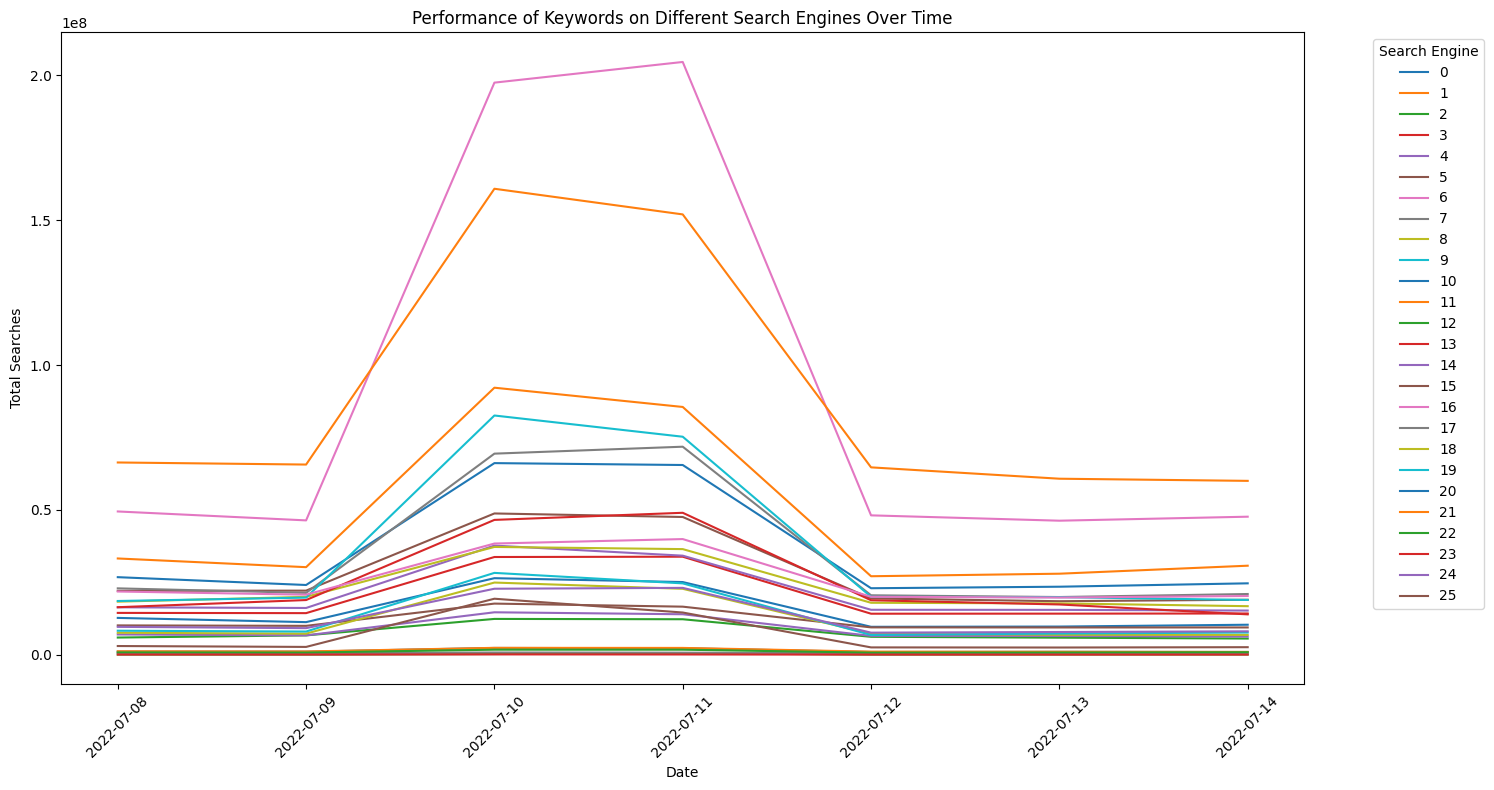

In [19]:
# Grouping data by date and search engine, then summing the searches
grouped_data = df.groupby(['date', 'search_engine'])['searches'].sum().reset_index()

# Plot 5 : Performance of Keywords on Different Search Engines over Time
plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped_data, x='date', y='searches', hue='search_engine', palette='tab10')
plt.title('Performance of Keywords on Different Search Engines Over Time')
plt.xlabel('Date')
plt.ylabel('Total Searches')
plt.xticks(rotation=45)
plt.legend(title='Search Engine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analysis of searches based on the date:**

The line graph above illustrates the performance of keywords on different search engines over time, based on the total number of searches. Each line represents a different search engine, and the y-axis shows the total number of searches for all keywords on that particular day.

We can see a higher peek on the 10th and 11th of july which are Sunday and Monday respectively.

With the actual data it is not possible to make any conclusion, but  it could be interrested if we had more data to see if it is a recurrent fact.

## Conclusion

As a conclusion, two targets are possible for a Marketing team. One could be to focus on the search engines number 24 and 25 to keep this niche while making them discover other items that are available.

Another work is to be done on the most popular search engines. As number 6 and 11 are clearly defined as the most popular one, there can be some marketing projects done to lower even more the ranks as they are the most frequented.

As the data are raws number, another work could have been done if we knew what were the top ranked keywords. Indeed, we could see some recurrent words through synonyms and see what are the top items. This way, it could have been grouped to analyze each items indenpendently.